In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
df = pd.read_csv('Brazil.csv')
df.head()

,Date,Envi,Fuji,Gala,type
0,27/12/2015,93034,246747,19104,0
1,20/12/2015,113404,188263,24478,0
2,13/12/2015,96222,321764,29349,0
3,6/12/2015,111259,378124,8808,0
4,29/11/2015,85241,179982,14146,0


## กราฟผลผลิตแต่ละสายพันธุ์ แยกตามประเภท

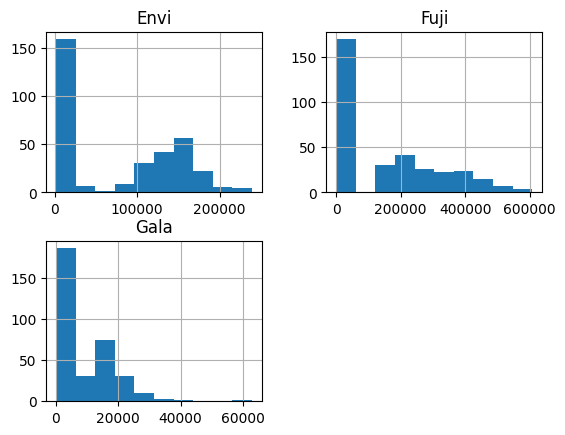

In [61]:
df.iloc[:, 1:4].hist();

## สร้างแกน Y เพื่อทำนายจากค่าเก่า

In [62]:
df['EnviY'] = df['Envi'].shift(-1) 
df['FujiY'] = df['Fuji'].shift(-1) 
df['GalaY'] = df['Gala'].shift(-1) 

df = df.dropna()

In [63]:
df.head()

,Date,Envi,Fuji,Gala,type,EnviY,FujiY,GalaY
0,27/12/2015,93034,246747,19104,0,113404.0,188263.0,24478.0
1,20/12/2015,113404,188263,24478,0,96222.0,321764.0,29349.0
2,13/12/2015,96222,321764,29349,0,111259.0,378124.0,8808.0
3,6/12/2015,111259,378124,8808,0,85241.0,179982.0,14146.0
4,29/11/2015,85241,179982,14146,0,100048.0,323797.0,18216.0


## Train model

In [64]:
X = df[['Envi', 'Fuji', 'Gala', 'type']]
y = df[['EnviY', 'FujiY', 'GalaY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

models = {}
for target_col in y_train.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[target_col])
    models[target_col] = model

y_pred = pd.DataFrame(index=y_test.index, columns=y_test.columns)
for target_col, model in models.items():
    y_pred[target_col] = model.predict(X_test)

## Score รวม

In [65]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

Mean Squared Error: 918053014.7524886
Mean Absolute Error: 13722.867737853501
R-squared (R²): 0.8947384852331886


## Score แต่ละสายพันธุ์

In [80]:
scores = {}
for target_col, model in models.items():
    scores[target_col] = model.score(X_test, y_test[target_col])
print(scores)

{'EnviY': 0.9123119144822638, 'FujiY': 0.9185388855999498, 'GalaY': 0.853364655617352}


## Plot linear regression graph

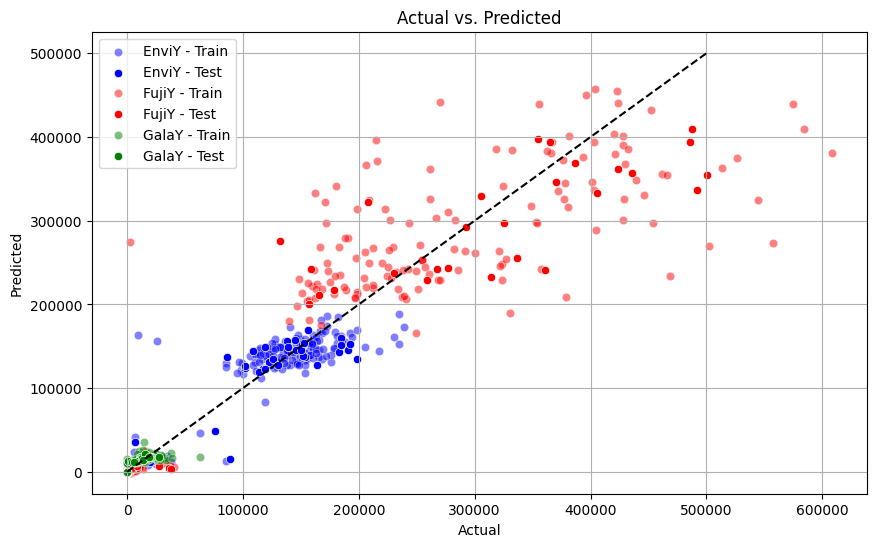

In [66]:
plt.figure(figsize=(10, 6))

# Plotting EnviY
sns.scatterplot(x=y_train['EnviY'], y=models['EnviY'].predict(X_train), color='blue', label='EnviY - Train', alpha=0.5)
sns.scatterplot(x=y_test['EnviY'], y=y_pred['EnviY'], color='blue', label='EnviY - Test')
# Plotting FujiY
sns.scatterplot(x=y_train['FujiY'], y=models['FujiY'].predict(X_train), color='red', label='FujiY - Train', alpha=0.5)
sns.scatterplot(x=y_test['FujiY'], y=y_pred['FujiY'], color='red', label='FujiY - Test')
# Plotting GalaY
sns.scatterplot(x=y_train['GalaY'], y=models['GalaY'].predict(X_train), color='green', label='GalaY - Train', alpha=0.5)
sns.scatterplot(x=y_test['GalaY'], y=y_pred['GalaY'], color='green', label='GalaY - Test')

max_val = max(y_test.max().max(), y_pred.max().max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()